In [26]:
# 1. Load Necessary Modules

import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# 2. Initialize the Documents

# Sample documents
documents = [
    "I am Learning Machine Learning",
    "Machine Learning is a Part of Artificial Intelligence",
    "Natural Language Processing Uses Machine Learning",
    "Chatbot is a Best Example of Natural Language Processing"
]

print("Documents:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")


Documents:
1. I am Learning Machine Learning
2. Machine Learning is a Part of Artificial Intelligence
3. Natural Language Processing Uses Machine Learning
4. Chatbot is a Best Example of Natural Language Processing


In [13]:
# 3. Tokenize the Documents

tokenized_docs = [doc.lower().split() for doc in documents]

print("Tokenized Documents:")
for i, tokens in enumerate(tokenized_docs, 1):
    print(f"{i}. {tokens}")


Tokenized Documents:
1. ['i', 'am', 'learning', 'machine', 'learning']
2. ['machine', 'learning', 'is', 'a', 'part', 'of', 'artificial', 'intelligence']
3. ['natural', 'language', 'processing', 'uses', 'machine', 'learning']
4. ['chatbot', 'is', 'a', 'best', 'example', 'of', 'natural', 'language', 'processing']


In [12]:
# 4. Creating Vocabulary

vocab = sorted(set(word for doc in tokenized_docs for word in doc))
print("Vocabulary:", vocab)


Vocabulary: ['a', 'am', 'artificial', 'best', 'chatbot', 'example', 'i', 'intelligence', 'is', 'language', 'learning', 'machine', 'natural', 'of', 'part', 'processing', 'uses']


In [14]:
# 5. Counting the Words -> TF Values

tf_matrix = []

for doc in tokenized_docs:
    tf_doc = Counter(doc)
    total_words = len(doc)

    tf_matrix.append([tf_doc[word] / total_words for word in vocab])

print("TF Matrix:")
tf_df = pd.DataFrame(tf_matrix, columns=vocab)
tf_df_transposed = tf_df.transpose()
display(tf_df_transposed)

TF Matrix:


,0,1,2,3
a,0.0,0.125,0.000000,0.111111
am,0.2,0.000,0.000000,0.000000
artificial,0.0,0.125,0.000000,0.000000
best,0.0,0.000,0.000000,0.111111
chatbot,0.0,0.000,0.000000,0.111111
example,0.0,0.000,0.000000,0.111111
i,0.2,0.000,0.000000,0.000000
intelligence,0.0,0.125,0.000000,0.000000
is,0.0,0.125,0.000000,0.111111
language,0.0,0.000,0.166667,0.111111


In [15]:
# 6. Calculate IDF Values

idf_matrix = []
total_docs = len(documents)

for word in vocab:
    word_doc = sum(1 for doc in tokenized_docs if word in doc)
    idf_value = math.log(total_docs / (1 + word_doc))
    idf_matrix.append(idf_value)

idf_df = pd.DataFrame({'Word': vocab, 'IDF': idf_matrix})
print("IDF Values:")
display(idf_df)


IDF Values:


,Word,IDF
0,a,0.287682
1,am,0.693147
2,artificial,0.693147
3,best,0.693147
4,chatbot,0.693147
5,example,0.693147
6,i,0.693147
7,intelligence,0.693147
8,is,0.287682
9,language,0.287682


In [21]:
# 7. Obtain TF-IDF Values

tf_idf_matrix = np.array(tf_matrix) * np.array(idf_matrix)

print("\nTF-IDF Matrix (Rows: Documents, Columns: Vocabulary):")
tf_idf_df = pd.DataFrame(tf_idf_matrix, columns=vocab)
tf_idf_df_transposed = tf_idf_df.transpose()
display(tf_idf_df_transposed)



TF-IDF Matrix (Rows: Documents, Columns: Vocabulary):


,0,1,2,3
a,0.000000,0.035960,0.000000,0.031965
am,0.138629,0.000000,0.000000,0.000000
artificial,0.000000,0.086643,0.000000,0.000000
best,0.000000,0.000000,0.000000,0.077016
chatbot,0.000000,0.000000,0.000000,0.077016
example,0.000000,0.000000,0.000000,0.077016
i,0.138629,0.000000,0.000000,0.000000
intelligence,0.000000,0.086643,0.000000,0.000000
is,0.000000,0.035960,0.000000,0.031965
language,0.000000,0.000000,0.047947,0.031965


In [8]:
# 8. Calculate Cosine Similarity

cosine_values = cosine_similarity(tf_idf_matrix)

print("\nCosine Similarity Matrix:")
cosine_df = pd.DataFrame(cosine_values, index=[f"Doc {i+1}" for i in range(len(documents))],
                         columns=[f"Doc {i+1}" for i in range(len(documents))])
display(cosine_df)


Cosine Similarity Matrix:


,Doc 1,Doc 2,Doc 3,Doc 4
Doc 1,1.0,0.000000,0.000000,0.000000
Doc 2,0.0,1.000000,0.000000,0.137209
Doc 3,0.0,0.000000,1.000000,0.208926
Doc 4,0.0,0.137209,0.208926,1.000000


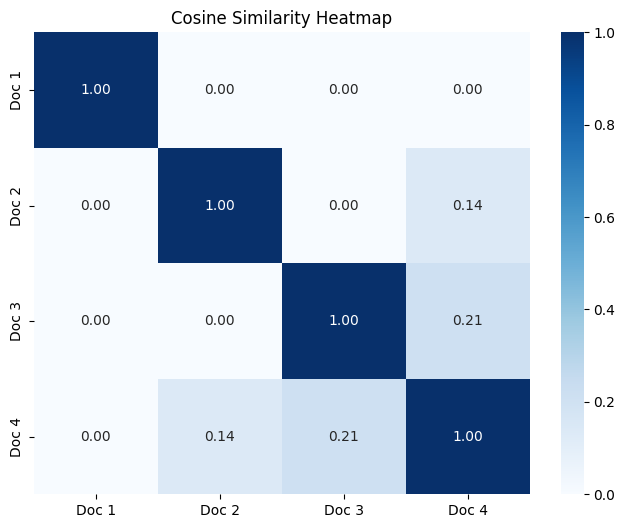

In [28]:
# Plooting the Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cosine_values, annot=True, cmap="Blues", fmt=".2f",
            xticklabels=[f"Doc {i+1}" for i in range(len(documents))],
            yticklabels=[f"Doc {i+1}" for i in range(len(documents))])
plt.title("Cosine Similarity Heatmap")
plt.show()
